In [ ]:
#Implement neural network

In [ ]:
#Theory
'''
Eg:
Imagine you're trying to teach a robot to recognize different types of fruit.
 A neural network is like a simplified model of the human brain that the robot uses to learn from examples of different fruits.
By adjusting its internal connections, the neural network improves its ability to correctly identify fruits over time.

Question: What is a neural network?
Answer: A neural network is a computational model inspired by the structure and functioning of the human brain. It consists of interconnected nodes, or neurons, organized in layers. Neural networks are capable of learning complex patterns from data and making predictions or decisions.

Question: What are the basic components of a neural network?
Answer: The basic components of a neural network include:

Input Layer: Receives input data.
Hidden Layers: Intermediate layers where computations are performed.
Output Layer: Produces the final output of the network.
Weights: Parameters that adjust the strength of connections between neurons.
Activation Functions: Functions that introduce non-linearity into the network.
Loss Function: Measures the difference between predicted and actual values.
Optimizer: Algorithm used to update the weights and minimize the loss function during training.
Question: How do you train a neural network?
Answer: Neural networks are trained using an optimization algorithm such as gradient descent. During training, the network adjusts its weights based on the error between predicted and actual values, minimizing the loss function.
This process is repeated for multiple iterations (epochs) until the model converges to a satisfactory solution.

Question: What is backpropagation?
Answer: Backpropagation is the core algorithm used to train neural networks.
It involves propagating the error backward through the network, from the output layer to the input layer,
and adjusting the weights based on the calculated gradients. This process allows the network to learn from its mistakes and improve its predictions over time.

Question: What are some common activation functions used in neural networks?
Answer: Some common activation functions include:

Sigmoid: S-shaped function, used in binary classification problems.
ReLU (Rectified Linear Unit): Linear function for positive values, zero for negative values, commonly used in hidden layers.
Tanh: Similar to sigmoid but with a range between -1 and 1, used in hidden layers.
Softmax: Converts raw scores into probabilities, commonly used in the output layer for multi-class classification problems.
Question: What is overfitting in neural networks, and how can it be prevented?
Answer: Overfitting occurs when a neural network learns to memorize the training data instead of generalizing patterns. It can be prevented by techniques such as:

Regularization: Adding penalties to the loss function to discourage complex models.
Dropout: Randomly disabling neurons during training to prevent co-adaptation.
Early Stopping: Stopping training when performance on a validation set starts to degrade.
Question: How do you evaluate the performance of a neural network?
Answer: The performance of a neural network can be evaluated using metrics such as accuracy, precision, recall, F1-score,
 and ROC-AUC score for classification tasks, and metrics like mean squared error (MSE) or mean absolute error (MAE) for regression tasks.
 Additionally, techniques like cross-validation can be used to assess the model's generalization performance.

'''

Epoch 1/50
24/24 [==============================] - 8s 132ms/step - loss: 1.6085 - accuracy: 0.3250 - val_loss: 1.4304 - val_accuracy: 0.3667
Epoch 2/50
24/24 [==============================] - 1s 27ms/step - loss: 1.4083 - accuracy: 0.3250 - val_loss: 1.2691 - val_accuracy: 0.3667
Epoch 3/50
24/24 [==============================] - 1s 43ms/step - loss: 1.2583 - accuracy: 0.3250 - val_loss: 1.1425 - val_accuracy: 0.3667
Epoch 4/50
24/24 [==============================] - 1s 28ms/step - loss: 1.1455 - accuracy: 0.3250 - val_loss: 1.0455 - val_accuracy: 0.3667
Epoch 5/50
24/24 [==============================] - 1s 26ms/step - loss: 1.0506 - accuracy: 0.3250 - val_loss: 0.9732 - val_accuracy: 0.3667
Epoch 6/50
24/24 [==============================] - 1s 31ms/step - loss: 0.9808 - accuracy: 0.3250 - val_loss: 0.9021 - val_accuracy: 0.3667
Epoch 7/50
24/24 [==============================] - 1s 25ms/step - loss: 0.9112 - accuracy: 0.3250 - val_loss: 0.8358 - val_accuracy: 0.3667
Epoch 8/50
2

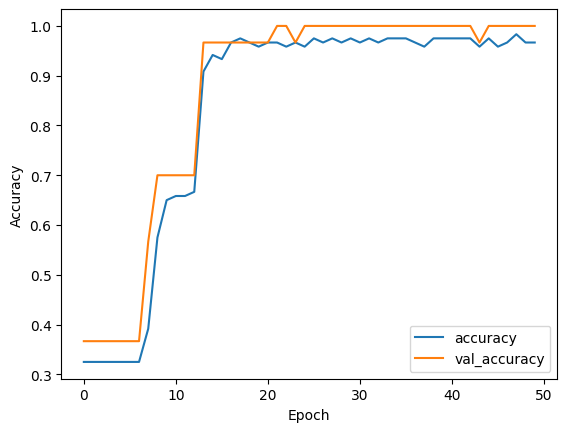

In [ ]:
#1 Implement neural network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=5, epochs=50, verbose=1, validation_data=(X_test, y_test))

# Predict probabilities and labels
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# Evaluate performance
def evaluate(y_true, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy: ", acc)

    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1 Score:", f1)

evaluate(np.argmax(y_test, axis=1), y_pred, y_prob)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()


Epoch 1/50
25/25 [==============================] - 2s 27ms/step - loss: 0.7604 - accuracy: 0.5487 - val_loss: 0.7093 - val_accuracy: 0.5050
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.5788 - val_loss: 0.6749 - val_accuracy: 0.5250
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6525 - accuracy: 0.6263 - val_loss: 0.6512 - val_accuracy: 0.5750
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6224 - accuracy: 0.6587 - val_loss: 0.6318 - val_accuracy: 0.5950
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5950 - accuracy: 0.6825 - val_loss: 0.6135 - val_accuracy: 0.6150
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5676 - accuracy: 0.7013 - val_loss: 0.5952 - val_accuracy: 0.6500
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5386 - accuracy: 0.7287 - val_loss: 0.5761 - val_accuracy: 0.6950
Epoch 8/50
25/25 

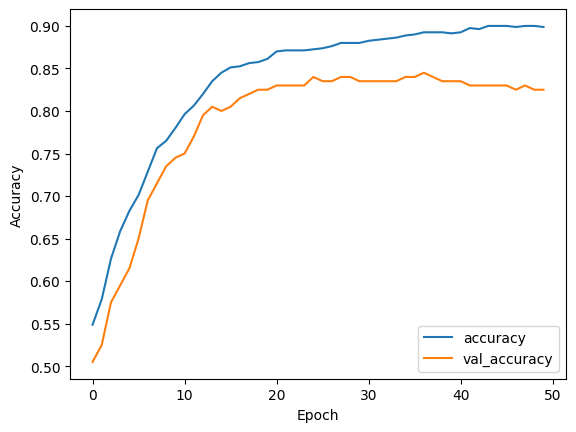

In [ ]:
#2 Example of implementing a neural network using TensorFlow/Keras for a binary classification teak,along with performance evaluation metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

# Predict probabilities and labels
y_prob = model.predict(X_test)
y_pred = np.round(y_prob)

# Evaluate performance
def evaluate(y_true, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    # Precision
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_true, y_pred)
    print("F1 Score:", f1)

evaluate(y_test, y_pred, y_prob)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
